In [31]:
import pandas as pd
df = pd.read_csv('root2ai - Data.csv')
df.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22704 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22704 non-null  object
dtypes: object(2)
memory usage: 354.9+ KB


In [33]:
df = df[pd.notnull(df['Text'])]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22701 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22701 non-null  object
dtypes: object(2)
memory usage: 532.1+ KB


In [35]:
df['id'] = df['Target'].factorize()[0]
from io import StringIO
category_id_df = df[['Target', 'id']].drop_duplicates().sort_values('id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['id', 'Target']].values)

In [36]:
category_id_df

,Target,id
0,Blockchain,0
1375,Bigdata,1
3642,credit reporting,2
5390,Cyber Security,3
8030,FinTech,4
16581,Microservices,5
17558,Neobanks,6
18627,Robo Advising,7
19364,Stock Trading,8
20151,Data Security,9


In [37]:
id_to_category

{0: 'Blockchain',
 1: 'Bigdata',
 2: 'credit reporting',
 3: 'Cyber Security',
 4: 'FinTech',
 5: 'Microservices',
 6: 'Neobanks',
 7: 'Robo Advising',
 8: 'Stock Trading',
 9: 'Data Security',
 10: 'Reg Tech'}

In [38]:
df.head()

,Text,Target,id
0,reserve bank forming expert committee based in...,Blockchain,0
1,director could play role financial system,Blockchain,0
2,preliminary discuss secure transaction study r...,Blockchain,0
3,security indeed prove essential transforming f...,Blockchain,0
4,bank settlement normally take three days based...,Blockchain,0


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Text).toarray()
labels = df.id
features.shape

(22701, 6401)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Target'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [41]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

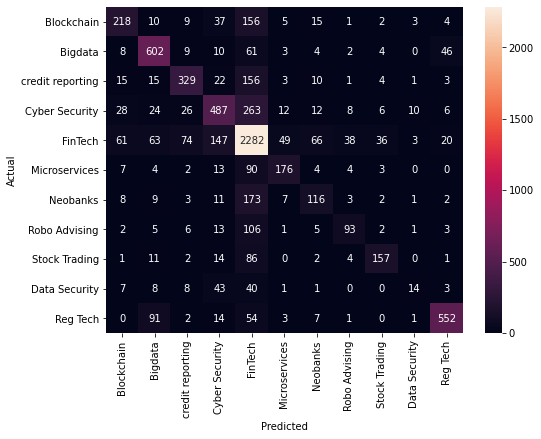

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Target.values, yticklabels=category_id_df.Target.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Target'].unique()))

                  precision    recall  f1-score   support

      Blockchain       0.61      0.47      0.53       460
         Bigdata       0.71      0.80      0.76       749
credit reporting       0.70      0.59      0.64       559
  Cyber Security       0.60      0.55      0.58       882
         FinTech       0.66      0.80      0.72      2839
   Microservices       0.68      0.58      0.63       303
        Neobanks       0.48      0.35      0.40       335
   Robo Advising       0.60      0.39      0.47       237
   Stock Trading       0.73      0.56      0.64       278
   Data Security       0.41      0.11      0.18       125
        Reg Tech       0.86      0.76      0.81       725

        accuracy                           0.67      7492
       macro avg       0.64      0.54      0.58      7492
    weighted avg       0.67      0.67      0.66      7492

